In [1]:
import sys
import findspark
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Setting spark home
findspark.init("/usr/local/spark")
from pyspark.sql import SparkSession

In [2]:
## Creating Spark session
spark = SparkSession.builder.config("spark.sql.hive.metastore.jars", "/usr/local/hive/lib/*").enableHiveSupport().getOrCreate()

spark.sql("SET spark.sql.legacy.createHiveTableByDefault=false")

## Use clickstream_db 
spark.sql("USE clickstream_db")

22/12/06 20:33:28 WARN Utils: Your hostname, uvsingh-workstation resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
22/12/06 20:33:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/06 20:33:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2022-12-06T20:33:38,421 INFO [Thread-3] org.apache.hadoop.hive.conf.HiveConf - Found configuration file file:/usr/local/hive/conf/hive-site.xml
2022-12-06T20:33:39,502 WARN [Thread-3] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.stats.jdbc.timeout does not exist
2022-12-06T20:33:39,503 WARN [Thread-3] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.stats.retries.wait does not exist
2022-12-06T20:33:39,503 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: Opening raw store with implementation class:org.apache.hadoop.hive.metastore.ObjectStore
2022-12-06T20:33:39,555 INFO [Thread-3] org.apache.hadoop.hive.metastore.ObjectStore - ObjectStore, initialize called
2022-12-06T20:33:39,763 INFO [Thread-3] DataNucleus.Persistence - Property hive.metastore.integral.jdo.pushdown unknown - will be ignored
2022-1

DataFrame[]

In [3]:
data = spark.sql("SELECT * FROM clickstream_db.activeusers")

2022-12-06T20:33:42,848 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_database: clickstream_db
2022-12-06T20:33:42,852 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_database: clickstream_db	
2022-12-06T20:33:42,867 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_table : db=clickstream_db tbl=activeusers
2022-12-06T20:33:42,868 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_table : db=clickstream_db tbl=activeusers	
2022-12-06T20:33:43,077 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_table : db=clickstream_db tbl=activeusers
2022-12-06T20:33:43,077 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_table : db=clickstream_db tbl=activeusers	


In [46]:
columns_name = data.columns

In [4]:
pd_df = data.toPandas()
pd_df.head()

,userid,cnt


ValueError: max() arg is an empty sequence

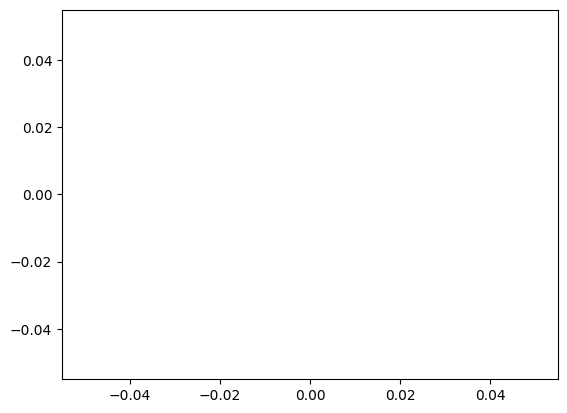

In [5]:
## Most active users

f, ax = plt.subplots(1)
x_data = list(pd_df.head()["userid"])
y_data = list(pd_df.head()["count"])

ax.bar(x_data, y_data)
ax.set_ylim(ymin=(max(y_data)*94)/100, ymax=max(y_data)+(max(y_data)*2)/100)

ax.set_ylabel("Count", size=12, fontweight="bold")
ax.set_xlabel("UserIDs", size=12, fontweight="bold")
ax.set_title("Top 5 Most Active Users", size=16,fontweight="bold")

f.savefig("images/top5_activeusers.png", bbox_inches='tight')

In [ ]:
## Day Wise Traffic 
dayWiseTraffic_df = spark.sql("SELECT * FROM clickstream_db.daywise_traffic_analysis").toPandas()

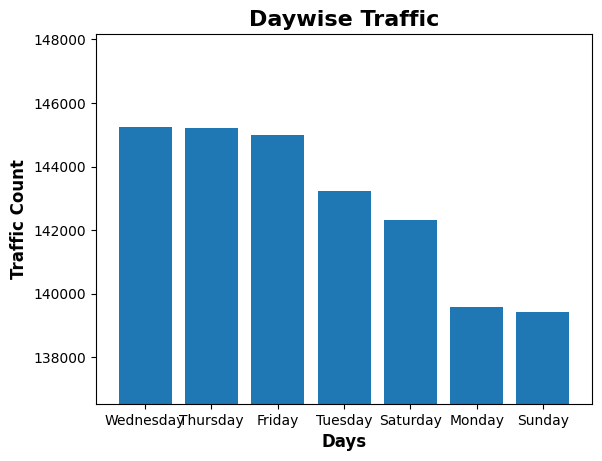

In [88]:
## Day Wise Traffic 

f, ax = plt.subplots(1)
x_data = list(dayWiseTraffic_df["DayOfWeek"])
y_data = list(dayWiseTraffic_df["count"])

ax.bar(x_data, y_data)
# ax.set_ylim(ymin=126000, ymax=147000)
ax.set_ylim(ymin=(max(y_data)*94)/100, ymax=max(y_data)+(max(y_data)*2)/100)

ax.set_ylabel("Traffic Count", size=12, fontweight="bold")
ax.set_xlabel("Days", size=12,fontweight="bold")
ax.set_title("Daywise Traffic", size=16,fontweight="bold")

plt.show(f)

f.savefig("images/dayWiseTrafficAnalysis.png", bbox_inches='tight')

In [61]:
## User Item Visit
useritemvisit_df = spark.sql("SELECT * FROM clickstream_db.useritemvisit").toPandas()
useritemvisit_df.head()

2022-12-06T18:00:30,220 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_database: clickstream_db
2022-12-06T18:00:30,221 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_database: clickstream_db	
2022-12-06T18:00:30,241 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_table : db=clickstream_db tbl=useritemvisit
2022-12-06T18:00:30,242 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_table : db=clickstream_db tbl=useritemvisit	
2022-12-06T18:00:30,307 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_table : db=clickstream_db tbl=useritemvisit
2022-12-06T18:00:30,307 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_table : db=clickstream_db tbl=useritemvisit	


,product,cnt
0,Pen,10539
1,AC,10531
2,Pants,10520
3,PC,10454
4,Marker,10450


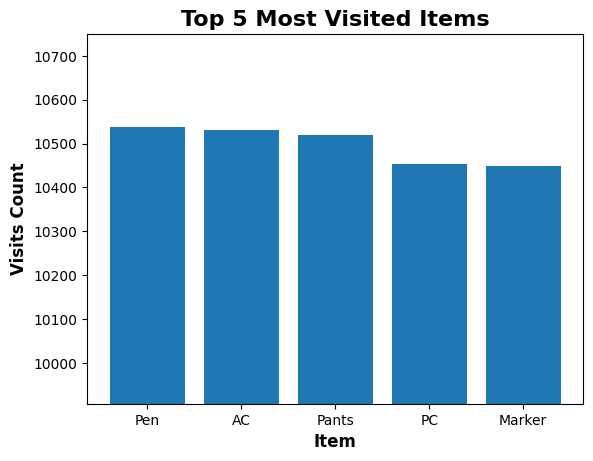

In [87]:
## User Item Visit

f, ax = plt.subplots(1)
x_data = list(useritemvisit_df.head()["product"])
y_data = list(useritemvisit_df.head().cnt)

ax.bar(x_data, y_data)
ax.set_ylim(ymin=(max(y_data)*94)/100, ymax=max(y_data)+(max(y_data)*2)/100)

ax.set_ylabel("Visits Count", size=12, fontweight="bold")
ax.set_xlabel("Item", size=12, fontweight="bold")
ax.set_title("Top 5 Most Visited Items", size=16,fontweight="bold")

f.savefig("images/top5_visitedItems.png", bbox_inches='tight')

In [69]:
# locationwisetraffic
locationwisetraffic_df = spark.sql("SELECT * FROM clickstream_db.locationwisetraffic").toPandas()
locationwisetraffic_df.sort_values(by='traffic_count', ascending=False, inplace=True)
locationwisetraffic_df.head()

2022-12-06T18:12:55,493 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_database: clickstream_db
2022-12-06T18:12:55,494 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_database: clickstream_db	
2022-12-06T18:12:55,509 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_table : db=clickstream_db tbl=locationwisetraffic
2022-12-06T18:12:55,509 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_table : db=clickstream_db tbl=locationwisetraffic	
2022-12-06T18:12:55,550 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_table : db=clickstream_db tbl=locationwisetraffic
2022-12-06T18:12:55,551 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_table : db=clickstream_db tbl=locationwisetraffic	


,location,traffic_count
6,Chennai,32585
26,Ranikhet,32549
22,Nagpur,32496
17,Kedarnath,32469
8,Dewas,32446


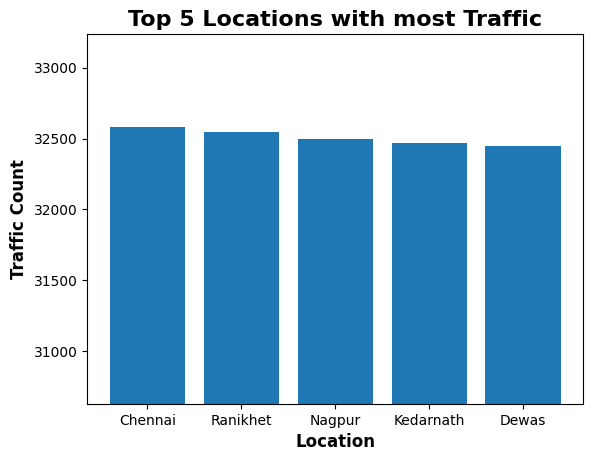

In [93]:
## Location Wise Traffic analysis

f, ax = plt.subplots(1)
x_data = list(locationwisetraffic_df.head()["location"])
y_data = list(locationwisetraffic_df.head()["traffic_count"])

ax.bar(x_data, y_data)
ax.set_ylim(ymin=(max(y_data)*94)/100, ymax=max(y_data)+(max(y_data)*2)/100)

ax.set_ylabel("Traffic Count", size=12, fontweight="bold")
ax.set_xlabel("Location", size=12, fontweight="bold")
ax.set_title("Top 5 Locations with most Traffic", size=16,fontweight="bold")

# ax.grid('on')

f.savefig("images/top5_mostActiveLocations.png", bbox_inches='tight')

In [103]:
# shopping_cart_analysis
shopping_cart_analysis_df = spark.sql("SELECT * FROM clickstream_db.shopping_cart_analysis").toPandas()
shopping_cart_analysis_df["Sum"] = shopping_cart_analysis_df.iloc[:,1:].sum(axis=1)
shopping_cart_analysis_df.sort_values(by='Sum', ascending=False, inplace=True)
shopping_cart_analysis_df.head()

2022-12-06T18:54:12,785 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_database: clickstream_db
2022-12-06T18:54:12,786 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_database: clickstream_db	
2022-12-06T18:54:12,804 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_table : db=clickstream_db tbl=shopping_cart_analysis
2022-12-06T18:54:12,804 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_table : db=clickstream_db tbl=shopping_cart_analysis	
2022-12-06T18:54:12,837 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore - 0: get_table : db=clickstream_db tbl=shopping_cart_analysis
2022-12-06T18:54:12,837 INFO [Thread-3] org.apache.hadoop.hive.metastore.HiveMetaStore.audit - ugi=hadoopusr	ip=unknown-ip-addr	cmd=get_table : db=clickstream_db tbl=shopping_cart_analysis	


,Item,view_count,addtocart_count,removefromcart_count,purchase_count,Sum
21,Jeans,10419,10424,10541,10587,41971
18,AC,10531,10390,10574,10393,41888
0,PC,10454,10429,10547,10431,41861
12,Mouse,10418,10505,10418,10466,41807
20,Screen Protector,10395,10464,10431,10498,41788


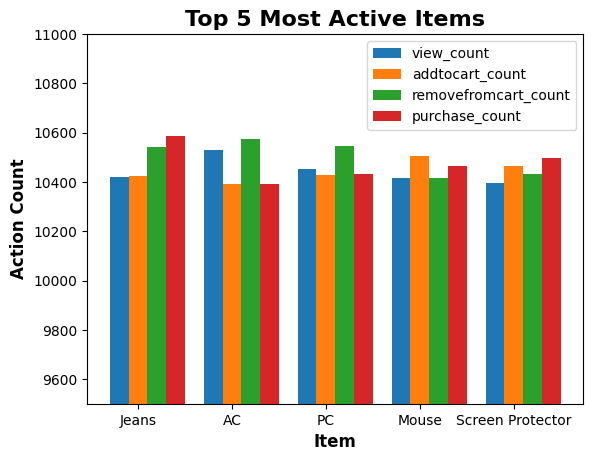

In [121]:
N = 5
ind = np.arange(N)
width = 0.20

view_count = list(shopping_cart_analysis_df["view_count"].head())
addtocart_count = list(shopping_cart_analysis_df["addtocart_count"].head())
removefromcart_count = list(shopping_cart_analysis_df["removefromcart_count"].head())
purchase_count = list(shopping_cart_analysis_df["purchase_count"].head())

items = list(shopping_cart_analysis_df["Item"].head())

bar1 = plt.bar(ind, view_count, width)
bar2 = plt.bar(ind+width, addtocart_count, width)
bar3 = plt.bar(ind+width*2, removefromcart_count, width)
bar4 = plt.bar(ind+width*3, purchase_count, width)

plt.xlabel("Item", size=12, fontweight="bold")
plt.ylabel("Action Count", size=12, fontweight="bold")


plt.title("Top 5 Most Active Items", size=16, fontweight="bold")

plt.xticks(ind+width, items)
plt.legend((bar1, bar2, bar3, bar4), ('view_count', 'addtocart_count', 'removefromcart_count', 'purchase_count'))

plt.ylim(9500, 11000)

plt.savefig("images/top5_mostActiveItems.png", bbox_inches='tight')
plt.show()